# **1. Importing Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
path = '/content/drive/My Drive/Colab Notebooks/DM1/Project/'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv(path + 'absenteeism_data.csv', delimiter=';')

# **2. Data Exploration**



## 2.1. Getting to know the dataset

In [5]:
data.shape

(800, 22)

In [6]:
data.count()

,0
ID,800
Reason for absence,740
Month of absence,737
Day of the week,740
Seasons,573
Days since previous absence,781
Transportation expense,800
Distance from Residence to Work,800
Estimated commute time,800
Service time,800


In [7]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13,...,No,1,2,Y,No,1,90,172,30,4
1,36,Unspecified,July,Tuesday,NaN,0.0,118,13,26,18,...,Yes,1,1,Y,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18,...,No,1,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,NaN,0.0,279,5,5,14,...,No,1,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13,...,No,1,2,Yes,No,1,90,172,30,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               800 non-null    int64  
 1   Reason for absence               740 non-null    object 
 2   Month of absence                 737 non-null    object 
 3   Day of the week                  740 non-null    object 
 4   Seasons                          573 non-null    object 
 5   Days since previous absence      781 non-null    float64
 6   Transportation expense           800 non-null    int64  
 7   Distance from Residence to Work  800 non-null    int64  
 8   Estimated commute time           800 non-null    int64  
 9   Service time                     800 non-null    object 
 10  Years until retirement           800 non-null    int64  
 11  Date of Birth                    800 non-null    object 
 12  Disciplinary failure  

The variable **"Seasons"** has a lot of missing values. We can get around this problem in rows in which there is no **"Seasons"** data but there is a **"Month of Absense"** variable.



In [9]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Days since previous absence', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Date of Birth',
       'Disciplinary failure', 'Education', 'Number of children',
       'Social drinker', 'Social smoker', 'Number of pets', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

### 2.1.1. Distribution of values in features

In [10]:
data2 = data.copy()

####Absenteeism in Hours

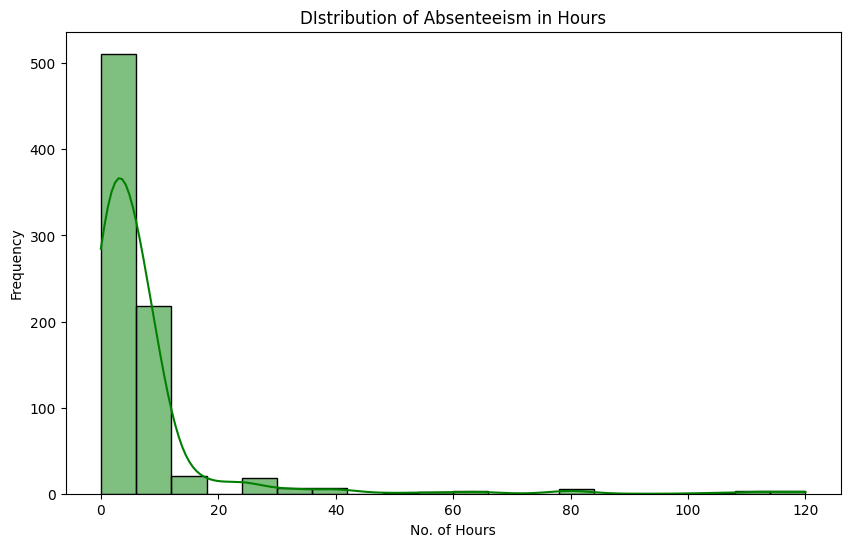

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data2['Absenteeism time in hours'], kde=True, bins=20, color='green')
plt.title('DIstribution of Absenteeism in Hours')
plt.xlabel('No. of Hours')
plt.ylabel('Frequency')
plt.show()

#### Reason for Absence

In [12]:
data2['Reason for absence'].value_counts()

,count
Reason for absence,
Medical consultation,149
Dental consultation,112
Physiotherapy,69
Diseases of the musculoskeletal system and connective tissue,55
Unspecified,43
"Injury, poisoning and other consequences of external causes",40
Patient follow-up,38
Unjustified absence,33
Laboratory examination,31


For purposes of a easier analysis, we will split the data into **5 categories** of Reasons for absence:

1.   **Medical Appointment**;
2.   **Disease**;
3.   **Pregnancy**;
4.   **Unjustified**;
5.   **Unspecified**.

In [13]:
def agrupar_razao(razao):
    r = str(razao).lower()

    if 'consultation' in r or 'physiotherapy' in r or 'donation' in r or 'examination' in r or 'follow-up' in r or 'abnormalities' in r:
        return 'Medical Appointment'

    elif 'diseases' in r or 'neoplasms' in r or 'injury' in r or 'disorders' in r or 'symptoms' in r or 'health' in r:
        return 'Disease'

    elif 'pregnancy' in r or 'perinatal' in r:
        return 'Pregnancy'

    elif 'unjustified' in r:
        return 'Unjustified'

    elif 'unspecified' in r:
        return 'Unspecified'

    else:
        return 'N/A'

data2['ReasonCat'] = data2['Reason for absence'].apply(agrupar_razao)

data2['ReasonCat'].value_counts()

,count
ReasonCat,
Medical Appointment,403
Disease,256
N/A,60
Unspecified,43
Unjustified,33
Pregnancy,5


In [14]:
total_absent_hours_reason = data2.groupby('ReasonCat')['Absenteeism time in hours'].sum()

print(total_absent_hours_reason)

avg_absent_hours_reason = data2.groupby('ReasonCat')['Absenteeism time in hours'].mean()

print(avg_absent_hours_reason)

ReasonCat
Disease                3513
Medical Appointment    1349
N/A                     546
Pregnancy                22
Unjustified             240
Unspecified               0
Name: Absenteeism time in hours, dtype: int64
ReasonCat
Disease                13.722656
Medical Appointment     3.347395
N/A                     9.100000
Pregnancy               4.400000
Unjustified             7.272727
Unspecified             0.000000
Name: Absenteeism time in hours, dtype: float64


#### Month of Absence

/tmp/ipython-input-1199549458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Month of absence', ylabel='Absenteeism time in hours'>

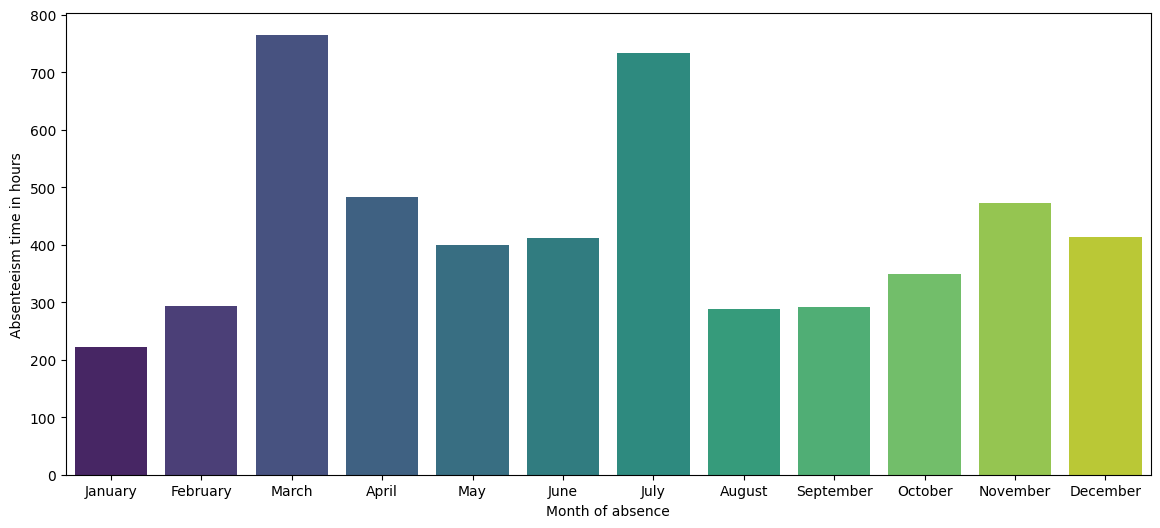

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data2['Month of absence'] = pd.Categorical(data2['Month of absence'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 6))

sns.barplot(
    data=data2,
    x='Month of absence',
    y='Absenteeism time in hours',
    estimator=sum,
    errorbar=None,
    order=month_order,
    palette='viridis')

The month in which there are more absenteeism is in **March**, and the less is in **January**.

#### Seasons

Since we have some missing values in the "Season", we will fill that with the "Month of Absence" variable. **We have to pay attention that the company in question is located in Brasil (South Hemisfere).**

In [16]:
season_mapping = {
    'December': 'Summer', 'January': 'Summer', 'February': 'Summer',
    'March': 'Autumn', 'April': 'Autumn', 'May': 'Autumn',
    'June': 'Winter', 'July': 'Winter', 'August': 'Winter',
    'September': 'Spring', 'October': 'Spring', 'November': 'Spring'
}

data2['Seasons'] = data2['Seasons'].fillna(data2['Month of absence'].map(season_mapping))

/tmp/ipython-input-3387827095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seasons', y='Absenteeism time in hours', data=data2, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='Spectral')


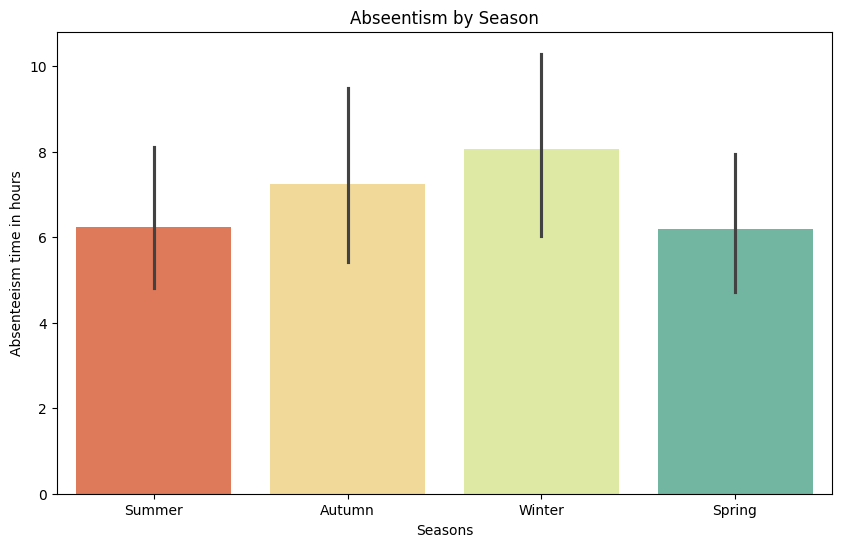

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Absenteeism time in hours', data=data2, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='Spectral')
plt.title('Abseentism by Season')
plt.show()

The season in which there are more absenteeism is in **Winter**.

#### Day of the Week

/tmp/ipython-input-1671461995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=data2, palette="Set2")


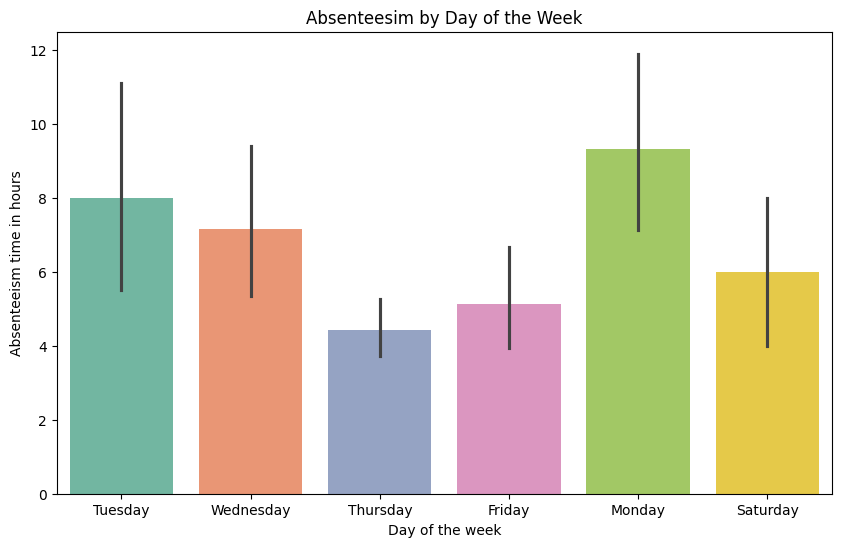

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=data2, palette="Set2")
plt.title('Absenteesim by Day of the Week')
plt.show()

The day of the week which has more absenteeism are "**Mondays**", and the one which as least are "**Thursdays**".

#### Service Time

In [19]:
data2['Service time'].value_counts()

,count
Service time,
18,150
9,130
14,89
13,75
12,60
11,57
10,56
16,43
-,28


/tmp/ipython-input-1367333075.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=sum, order=years_ordered, palette='magma')
/tmp/ipython-input-1367333075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=average, order=years_ordered, palette='viridis')


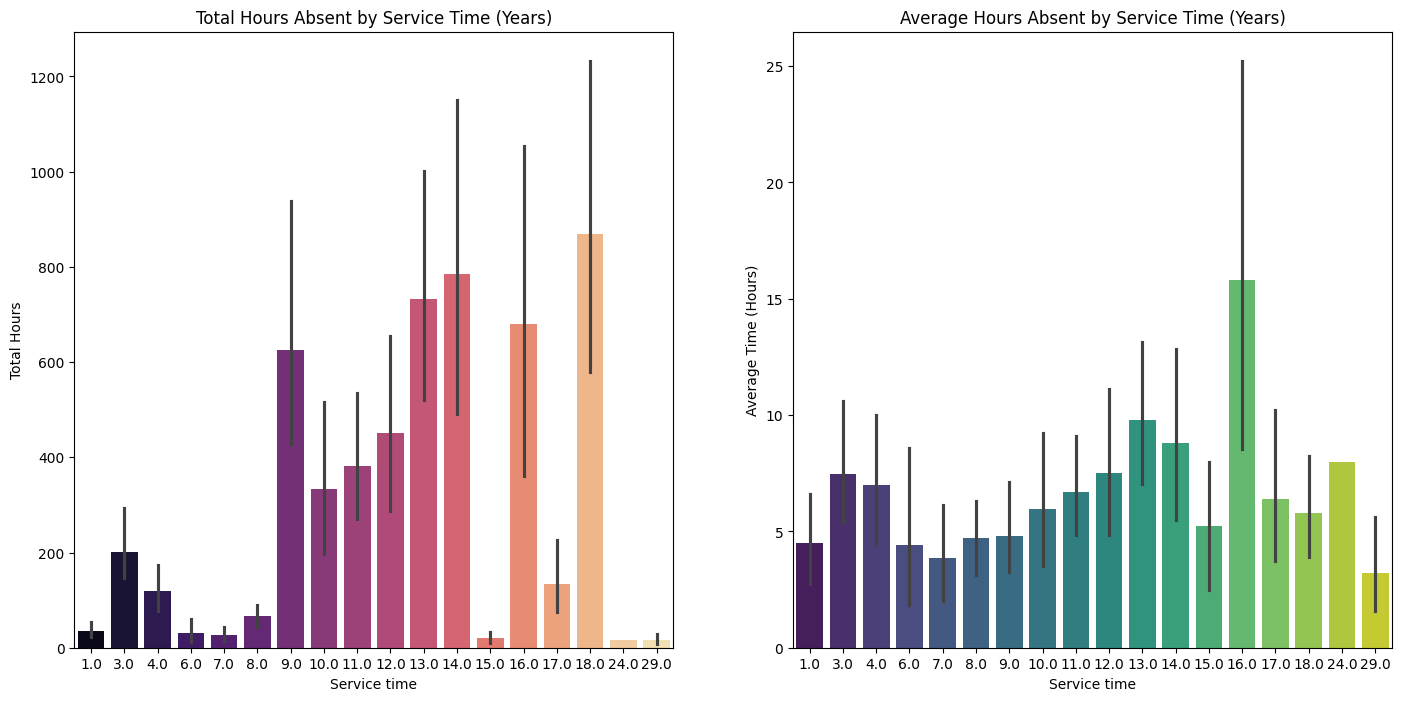

In [20]:
from numpy import average
data2['Service time'] = pd.to_numeric(data2['Service time'], errors='coerce')

years_ordered = sorted(data2['Service time'].dropna().unique())

plt.figure(figsize=(17,8))

plt.subplot(1, 2, 1)

sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=sum, order=years_ordered, palette='magma')
plt.title('Total Hours Absent by Service Time (Years)')
plt.ylabel('Total Hours')

plt.subplot(1, 2, 2)
sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=average, order=years_ordered, palette='viridis')
plt.title('Average Hours Absent by Service Time (Years)')
plt.ylabel('Average Time (Hours)')

plt.show()

(Interpretar)

####Years Until Retirement

([<matplotlib.axis.XTick at 0x7ef5194664e0>,
 [Text(-1, 0, '−1'),
  Text(7, 0, '7'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38')])

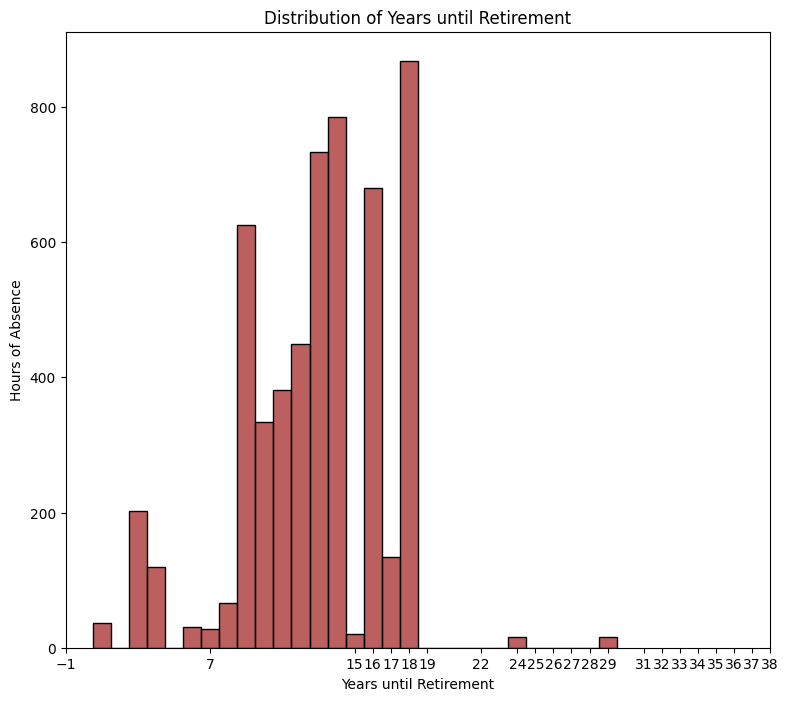

In [21]:
years_retirement_ordered = sorted(data2['Years until retirement'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data = data2, x='Service time', weights='Absenteeism time in hours', discrete=True, color='brown')
plt.title('Distribution of Years until Retirement')
plt.xlabel('Years until Retirement')
plt.ylabel('Hours of Absence')
plt.xticks(years_retirement_ordered)

We can see that there are rows in wich the years until retirement is **"-1" (which is not possible)**. We have to deal with this in the Pre Processing Phase.

####Age

We will create a variable called **"Age"** that is easier to interpret and visualize than **"Date of Birth"**.

In [22]:
data2['Date of Birth'] = pd.to_datetime(data2['Date of Birth'])

data2['Age'] = 2025 - data2['Date of Birth'].dt.year

In [23]:
data2['Age'].value_counts()

,count
Age,
28,131
38,122
37,82
40,63
36,58
33,54
30,49
50,39
41,33


In [24]:
data2['Age'].max()


58

In [25]:
data2['Age'].min()

27

For purposes of a easier analysis, we will split the data into **4 categories** of Age:

1.   **Young adults** (< 30 years);
2.   **Established Adults** (30 - 39 years);
3.   **Middle Aged** (40 - 49 years);
4.   **Seniors** (The ones closer to retirement) (50+ years).

In [26]:
def age_categories(idade):
    if idade < 30:
        return 'Young adults'
    elif 30 <= idade <= 39:
        return 'Established Adults'
    elif 40 <= idade <= 49:
        return 'Middle Aged'
    else:
        return 'Seniors'

data2['AgeCat'] = data2['Age'].apply(age_categories)

data2['AgeCat'].value_counts()

,count
AgeCat,
Established Adults,444
Middle Aged,161
Young adults,145
Seniors,50


In [27]:
data2['AgeCat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: AgeCat
Non-Null Count  Dtype 
--------------  ----- 
800 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB


In [28]:
total_absent_hours_age = data2.groupby('AgeCat')['Absenteeism time in hours'].sum()

print(total_absent_hours_age)

avg_absent_hours_age = data2.groupby('AgeCat')['Absenteeism time in hours'].mean()

print(avg_absent_hours_age)

AgeCat
Established Adults    3082
Middle Aged           1037
Seniors                786
Young adults           765
Name: Absenteeism time in hours, dtype: int64
AgeCat
Established Adults     6.941441
Middle Aged            6.440994
Seniors               15.720000
Young adults           5.275862
Name: Absenteeism time in hours, dtype: float64


#### Education

In [29]:
education_dict = {
    1: 'High School',
    2: 'Graduate',
    3: 'Postgraduate',
    4: "Master's or PhD"
}

data2['Education'] = data2['Education'].map(education_dict)

data2['Education'].value_counts()

,count
Education,
High School,662
Postgraduate,84
Graduate,50
Master's or PhD,4


In [30]:
total_absent_hours_educ = data2.groupby('Education')['Absenteeism time in hours'].sum()

print(total_absent_hours_educ)

avg_absent_hours_educ = data2.groupby('Education')['Absenteeism time in hours'].mean()

print(avg_absent_hours_educ)

Education
Graduate            306
High School        4912
Master's or PhD      21
Postgraduate        431
Name: Absenteeism time in hours, dtype: int64
Education
Graduate           6.120000
High School        7.419940
Master's or PhD    5.250000
Postgraduate       5.130952
Name: Absenteeism time in hours, dtype: float64


#### Number of Children

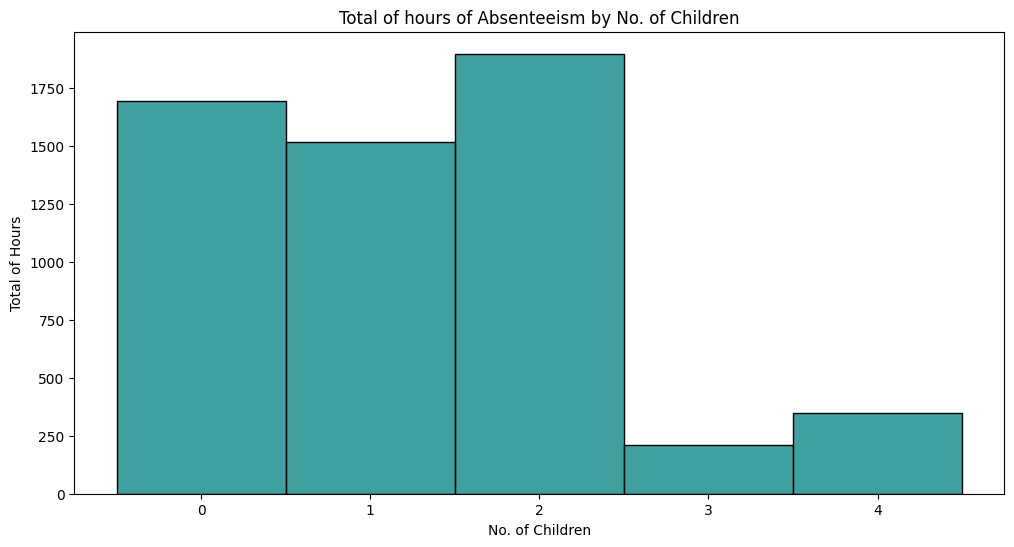

In [31]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Number of children', weights='Absenteeism time in hours', discrete=True, color='teal')

plt.title('Total of hours of Absenteeism by No. of Children')
plt.xlabel('No. of Children')
plt.ylabel('Total of Hours')
plt.xticks(range(5))
plt.show()

The workers that have **2 children** are the ones that have more total hours of absence in work.

#### Number of Pets

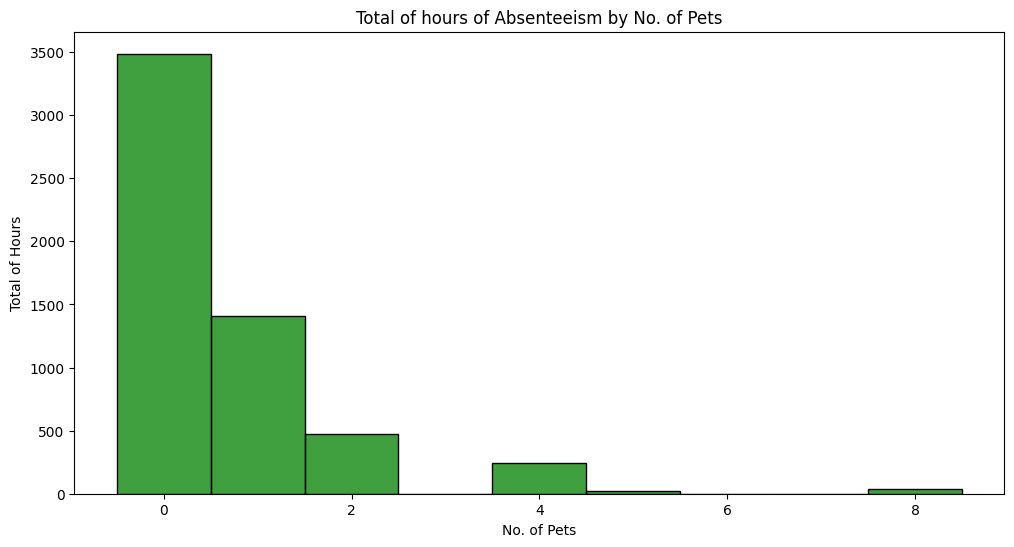

In [32]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Number of pets', weights='Absenteeism time in hours', discrete=True, color='green')

plt.title('Total of hours of Absenteeism by No. of Pets')
plt.xlabel('No. of Pets')
plt.ylabel('Total of Hours')
plt.show()

The category in which the workers have more time of absence, are the ones that have **no pets**.

#### Social Drinker

In [33]:
data2['Social drinker'].unique()

array(['Y', 'Yes', 'No'], dtype=object)

In a first analysis, we verified that part of the data **has neither "Yes" or "No" in the field, but instead had "Y"**. We assumed that **"Y" corresponds to "Yes"**, thus we had to transform it.

In [34]:
data2['Social drinker'] = data2['Social drinker'].replace({'Y': 'Yes', 'y': 'Yes'})

data2['Social drinker'].unique()

array(['Yes', 'No'], dtype=object)

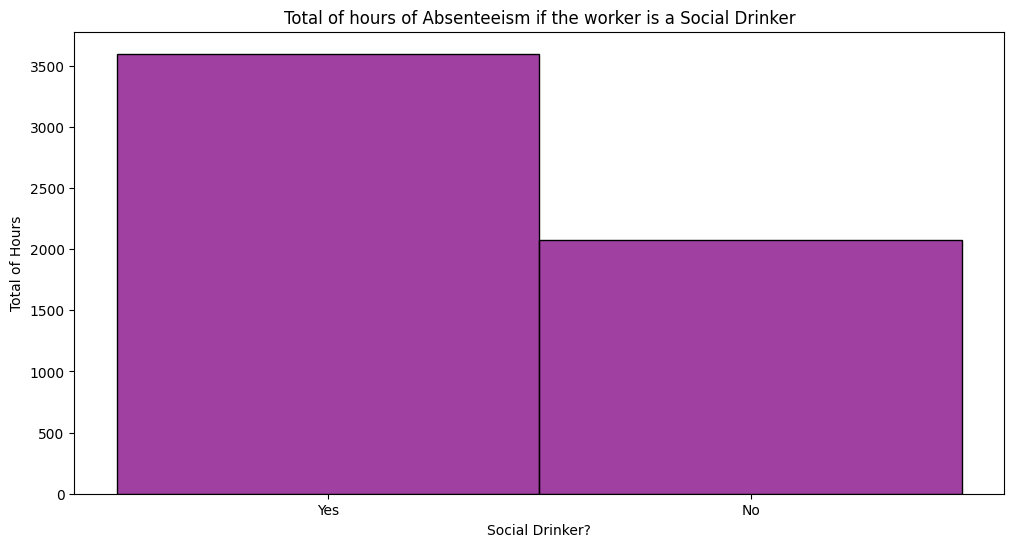

In [35]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Social drinker', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker is a Social Drinker')
plt.xlabel('Social Drinker?')
plt.ylabel('Total of Hours')
plt.show()

We observe that the **Social drinker have the more total hours absent than those who are not**.

#### Social smoker

In [36]:
data2['Social smoker'].unique()

array(['No', 'Yes', 'Y'], dtype=object)

In a first analysis, we verified that part of the data **has neither "Yes" or "No" in the field, but instead had "Y"**. We assumed that **"Y" corresponds to "Yes"**, thus we had to transform it.

In [37]:
data2['Social smoker'] = data2['Social smoker'].replace({'Y': 'Yes', 'y': 'Yes'})

data2['Social smoker'].unique()

array(['No', 'Yes'], dtype=object)

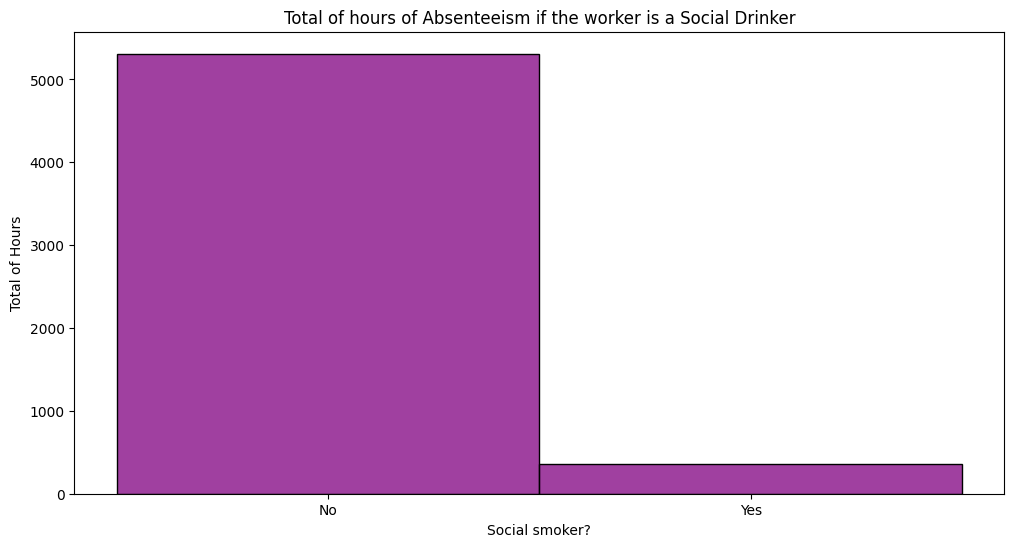

In [38]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Social smoker', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker is a Social Drinker')
plt.xlabel('Social smoker?')
plt.ylabel('Total of Hours')
plt.show()

We observe that the non **Social smokers have the more total hours absent than those who are**.

#### Disciplinary failure

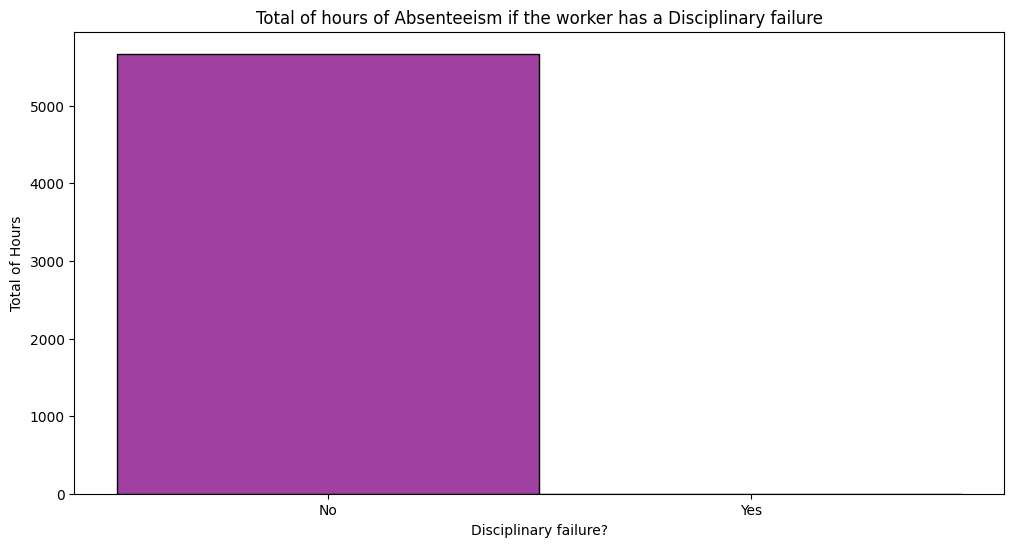

In [39]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Disciplinary failure', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker has a Disciplinary failure')
plt.xlabel('Disciplinary failure?')
plt.ylabel('Total of Hours')
plt.show()

In [40]:
data2['Disciplinary failure'].value_counts()

,count
Disciplinary failure,
No,756
Yes,44


We observe that the **wide majority of absence cases don't violate workplace policies**.

#### Transportation Expense

<Axes: xlabel='Transportation expense'>

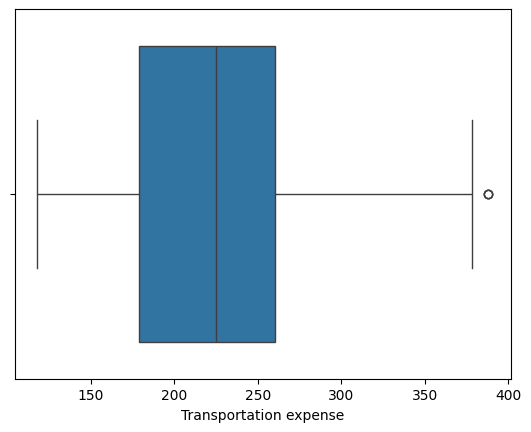

In [41]:
sns.boxplot(data=data2, x='Transportation expense')

#### Estimated Commute Time

([<matplotlib.axis.XTick at 0x7ef518f5c170>,
 [Text(5, 0, '5'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(31, 0, '31'),
  Text(34, 0, '34'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(45, 0, '45'),
  Text(48, 0, '48'),
  Text(50, 0, '50'),
  Text(52, 0, '52'),
  Text(54, 0, '54'),
  Text(56, 0, '56'),
  Text(59, 0, '59'),
  Text(63, 0, '63'),
  Text(69, 0, '69'),
  Text(81, 0, '81'),
  Text(85, 0, '85'),
  Text(94, 0, '94'),
  Text(97, 0, '97'),
  Text(98, 0, '98'),
  Text(100, 0, '100'),
  Text(108, 0, '108'),
  Text(114, 0, '114')])

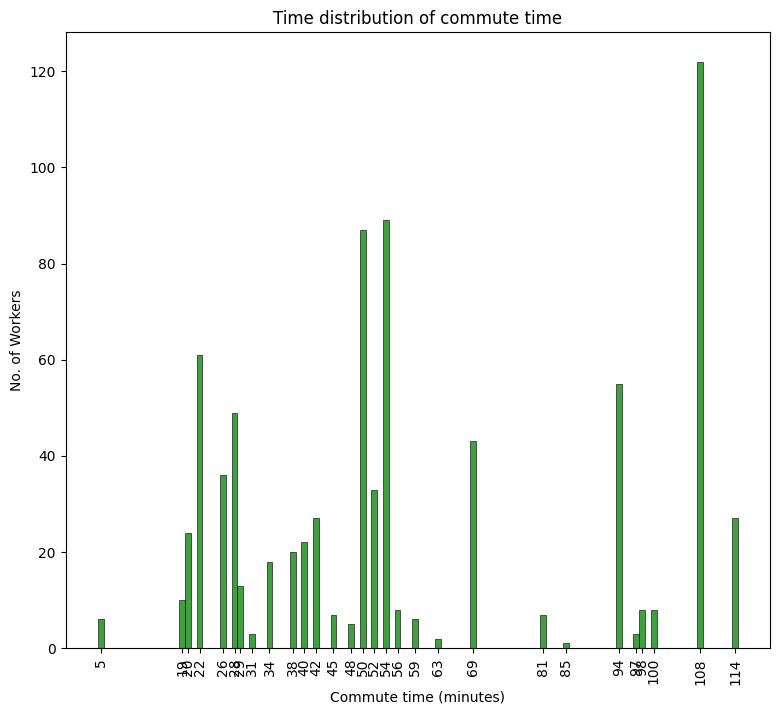

In [42]:
time_ordered = sorted(data2['Estimated commute time'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Estimated commute time'], discrete=True, color='green')
plt.title('Time distribution of commute time')
plt.xlabel('Commute time (minutes)')
plt.ylabel('No. of Workers')
plt.xticks(time_ordered, rotation=90)

#### Distance from Residence to Work

Text(0, 0.5, 'No. of Workers')

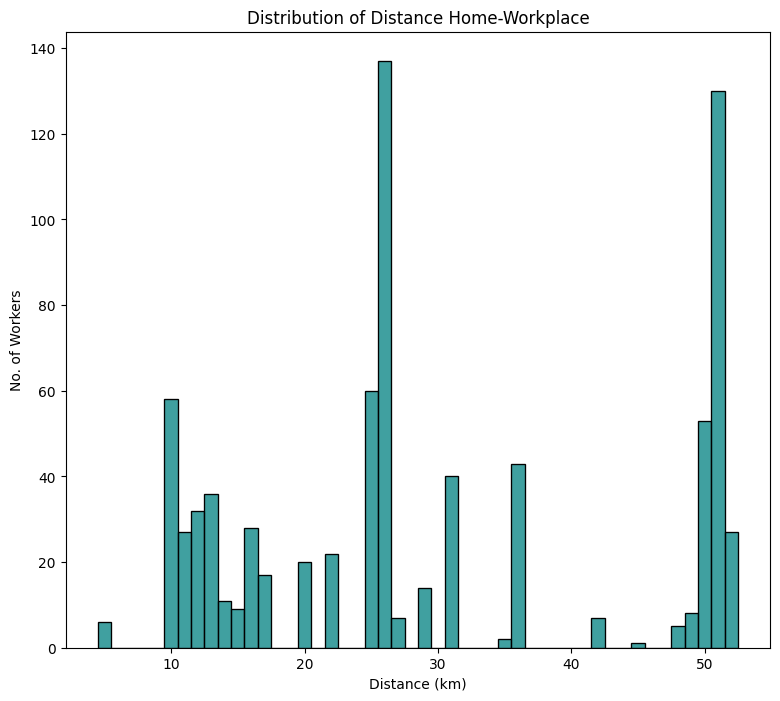

In [43]:
distance_ordered = sorted(data2['Distance from Residence to Work'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Distance from Residence to Work'], discrete=True, color='teal')
plt.title('Distribution of Distance Home-Workplace')
plt.xlabel('Distance (km)')
plt.ylabel('No. of Workers')

#### Days since previous absence

<Axes: xlabel='Days since previous absence'>

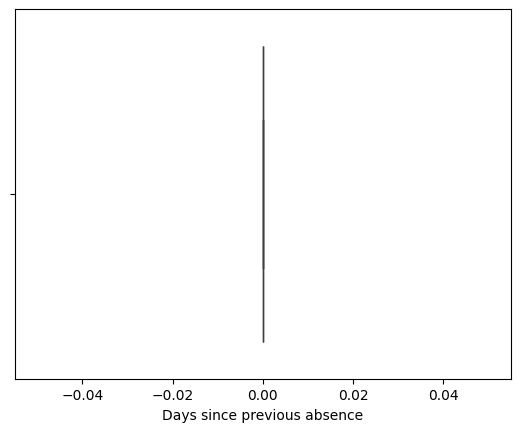

In [44]:
sns.boxplot(data=data2, x='Days since previous absence')

In [45]:
data2['Days since previous absence'].value_counts()

,count
Days since previous absence,
0.0,781


This variable has **no information whatsoever**.

#### Weight

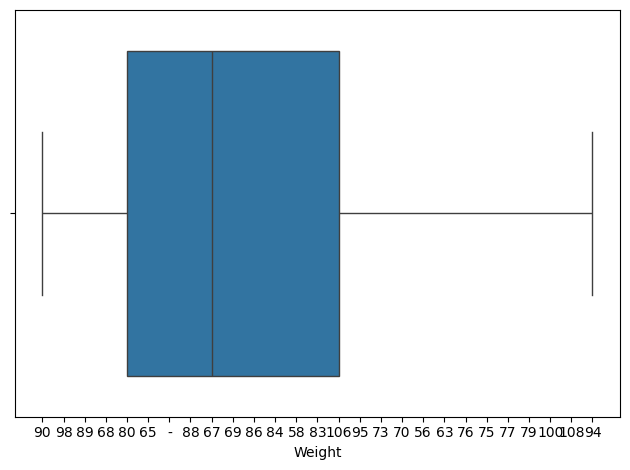

In [46]:
sns.boxplot(data=data2, x='Weight')
plt.tight_layout()

#### Height

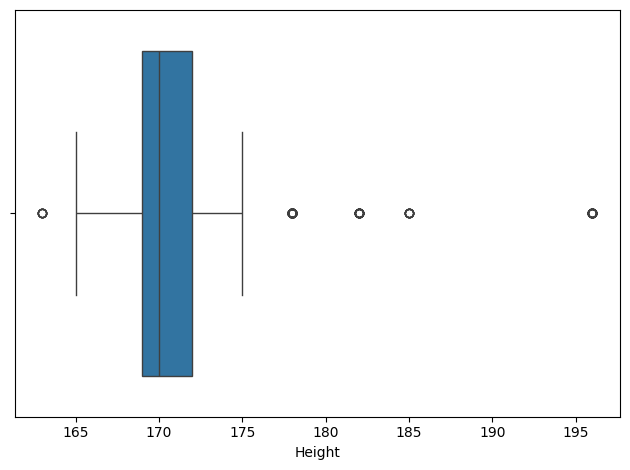

In [47]:
sns.boxplot(data=data2, x='Height')
plt.tight_layout()


#### Body Mass Index

([<matplotlib.axis.XTick at 0x7ef518bed5e0>,
 [Text(19, 0, '19'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(38, 0, '38')])

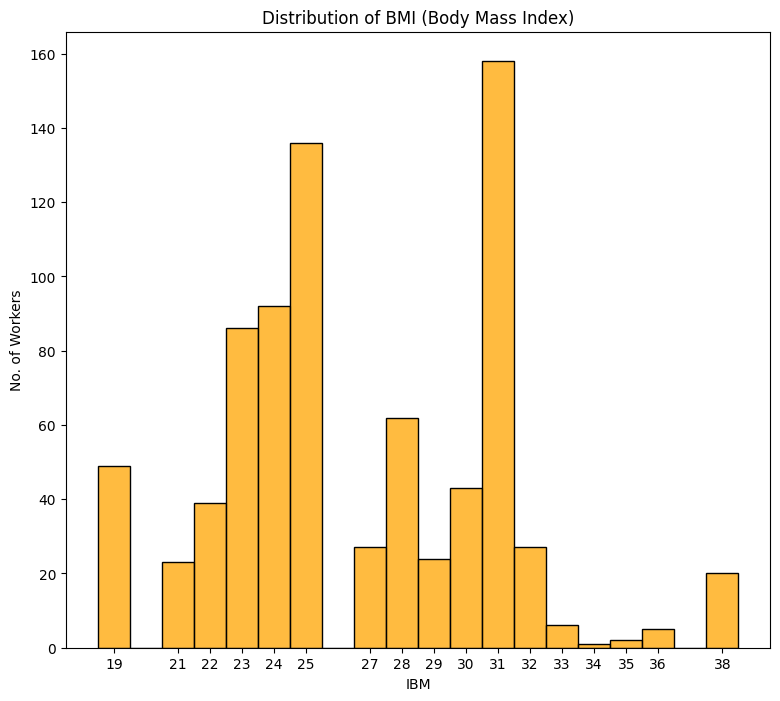

In [48]:
bmi_ordered = sorted(data2['Body mass index'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Body mass index'], discrete=True, color='orange')
plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('IBM')
plt.ylabel('No. of Workers')
plt.xticks(bmi_ordered)

#### Correlation Matrix

In [116]:
numeric_data = data2.drop('ID', axis=1)
numeric_data = data2.drop('Days since previous absence', axis=1)

for col in list(numeric_data.columns):
    dtype = str(numeric_data[col].dtype)

    if dtype != 'float64' and dtype != 'int64' and dtype != 'int32':
        numeric_data = numeric_data.drop(col, axis=1)

numeric_data.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Estimated commute time', 'Service time', 'Years until retirement',
       'Number of children', 'Number of pets', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Age'],
      dtype='object')

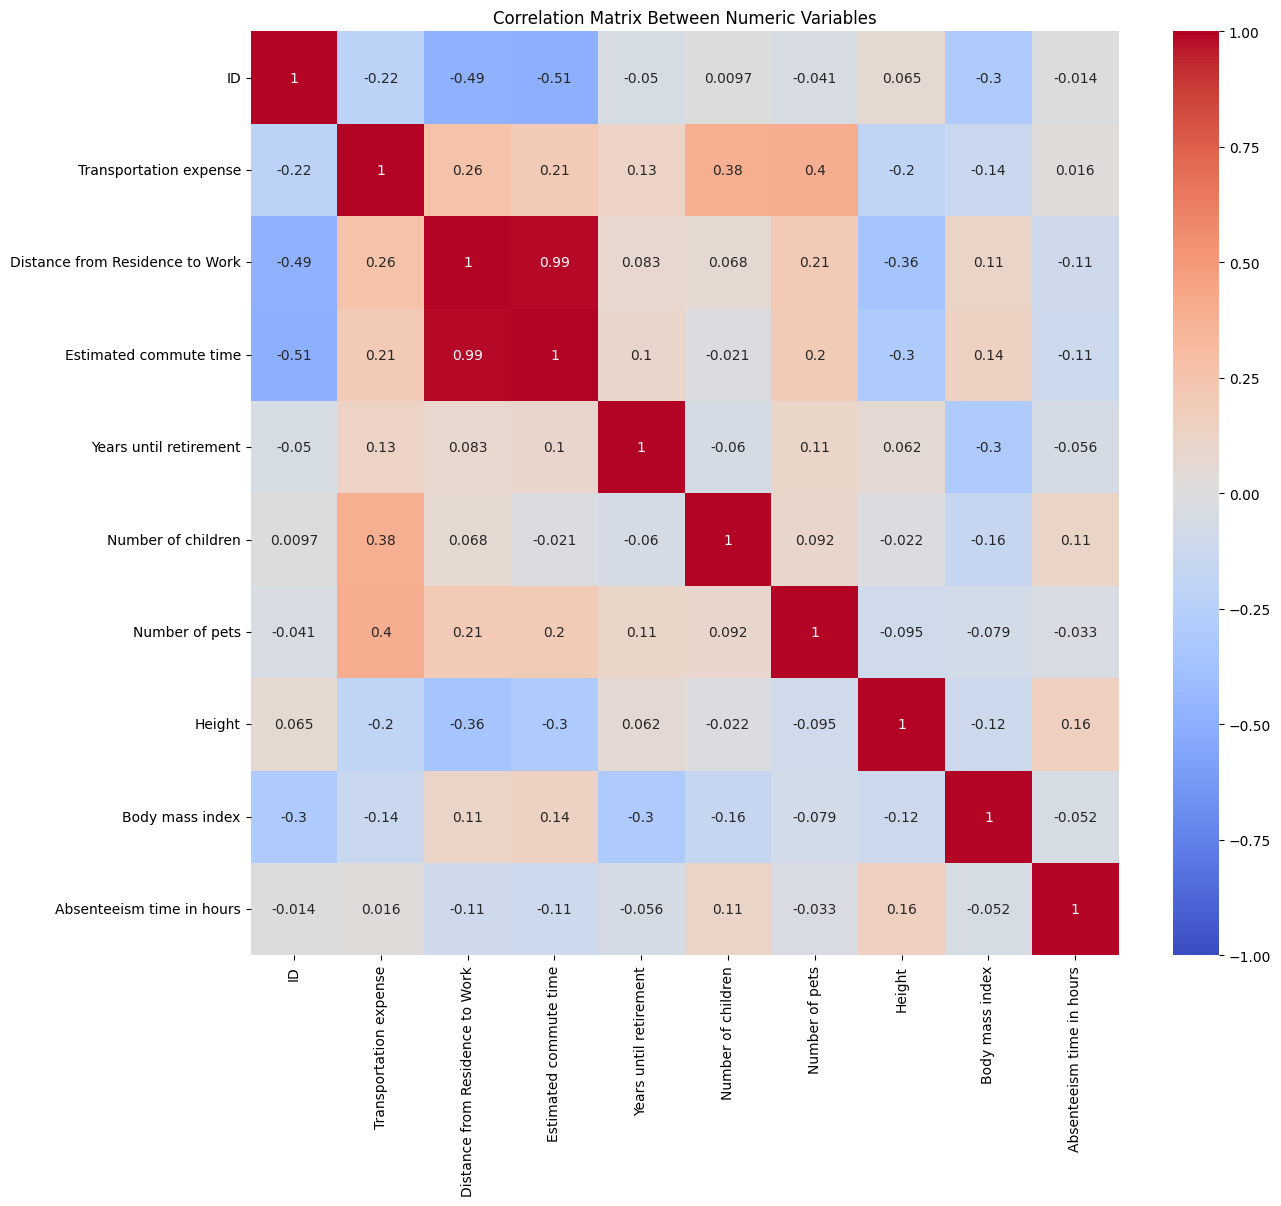

In [114]:
corr_matrix = numeric_data.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix Between Numeric Variables')
plt.show()

# **3. Data Preprocessing**

In [72]:
data3 = data2.copy()

In [73]:
data3.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours,ReasonCat,Age,AgeCat
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13.0,...,Yes,No,1,90,172,30,4,Unjustified,33,Established Adults
1,36,Unspecified,July,Tuesday,Winter,0.0,118,13,26,18.0,...,Yes,No,0,98,178,31,0,Unspecified,50,Seniors
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18.0,...,Yes,No,0,89,170,31,2,Medical Appointment,38,Established Adults
3,7,Diseases of the eye and adnexa,July,Thursday,Winter,0.0,279,5,5,14.0,...,Yes,Yes,0,68,168,24,4,Disease,39,Established Adults
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13.0,...,Yes,No,1,90,172,30,2,Medical Appointment,33,Established Adults


In [74]:
data3.columns


Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Days since previous absence', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Date of Birth',
       'Disciplinary failure', 'Education', 'Number of children',
       'Social drinker', 'Social smoker', 'Number of pets', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'ReasonCat', 'Age',
       'AgeCat'],
      dtype='object')

## 3.1. Handling Missing Values

In [75]:
total = data3.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total], axis=1, keys=['Total of Missing Values'])

missing_data = missing_data[missing_data['Total of Missing Values'] > 0]

print(missing_data)

                             Total of Missing Values
Month of absence                                  63
Seasons                                           62
Reason for absence                                60
Day of the week                                   60
Service time                                      28
Days since previous absence                       19


For the missing values in **"Service Time"**, we will fill those with the median Service Time of the corresponding Age. Since The variable "Age" is the one wich has the most correlation with "Service Time".

For the missing values in **"Reason for Absence"**, we will ignore them, since we will use the variable **"ReasonCat"** which already has the reason grouped into categories. This variable has a category "N/A" (that were previously missing values) but we will grouped them into the "Unspecified".

For the columns **"Seasons"** and **"Month of absence"**, we will prioritize mantining "Month of absence", since it is a more precise variable. In the Data Exploration phase we filled most missing values in "Month of absence" with the respective season, thus this 63 missing values are rows which have no season registered as well. We will impute the mode of "Month of absence" since we have no other way to fill these missing values.

The column **"Days since previous absence"** will also be removed, since the column holds no value (the data is only composed by "0").

For the missing values in **"Day of the week"**, we will check the month that those occurred, and fill the mode of the respective month.

In [85]:
median_by_age = data3.groupby('Age')['Service time'].transform('median')

data3['Service time'] = data3['Service time'].fillna(median_by_age)

print(data3['Service time'].isnull().sum())

0


In [77]:
data3['ReasonCat'] = data3['ReasonCat'].replace(['N/A'], 'Unspecified')

data3['ReasonCat'].value_counts()

,count
ReasonCat,
Medical Appointment,403
Disease,256
Unspecified,103
Unjustified,33
Pregnancy,5


In [78]:
month_mode = data3['Month of absence'].mode()[0]

data3['Month of absence'] = data3['Month of absence'].fillna(month_mode)

data3['Month of absence'].value_counts()

,count
Month of absence,
March,150
February,72
October,71
July,67
May,64
November,63
August,54
June,54
September,53


In [81]:
empty_lines = data3[data3['Day of the week'].isnull() & data3['Month of absence'].isnull()]

print(empty_lines)

Empty DataFrame
Columns: [ID, Reason for absence, Month of absence, Day of the week, Seasons, Days since previous absence, Transportation expense, Distance from Residence to Work, Estimated commute time, Service time, Years until retirement, Date of Birth, Disciplinary failure, Education, Number of children, Social drinker, Social smoker, Number of pets, Weight, Height, Body mass index, Absenteeism time in hours, ReasonCat, Age, AgeCat]
Index: []

[0 rows x 25 columns]


In [89]:
mode_by_month = data3.groupby('Month of absence')['Day of the week'].transform(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan)

data3['Day of the week'] = data3['Day of the week'].fillna(mode_by_month)

print(data3['Day of the week'].isnull().sum())

0


/tmp/ipython-input-3702421488.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_by_month = data3.groupby('Month of absence')['Day of the week'].transform(


In [91]:
total = data3.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total], axis=1, keys=['Total of Missing Values'])

missing_data = missing_data[missing_data['Total of Missing Values'] > 0]

print(missing_data)

                             Total of Missing Values
Seasons                                           62
Reason for absence                                60
Days since previous absence                       19


## 3.2. Selection

In [90]:
data3.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Days since previous absence', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Date of Birth',
       'Disciplinary failure', 'Education', 'Number of children',
       'Social drinker', 'Social smoker', 'Number of pets', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'ReasonCat', 'Age',
       'AgeCat'],
      dtype='object')

In [93]:
columns_to_drop = ['ID', 'Reason for absence', 'Seasons', 'Days since previous absence', 'Date of Birth', 'Weight', 'Height',
                  'Body mass index', 'AgeCat']

In [106]:
data4 = data3.drop(columns_to_drop, axis=1)

data4.columns

Index(['Month of absence', 'Day of the week', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Disciplinary failure',
       'Education', 'Number of children', 'Social drinker', 'Social smoker',
       'Number of pets', 'Absenteeism time in hours', 'ReasonCat', 'Age'],
      dtype='object')

## 3.3. Feature Engineering

In [107]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Month of absence                 800 non-null    category
 1   Day of the week                  800 non-null    object  
 2   Transportation expense           800 non-null    int64   
 3   Distance from Residence to Work  800 non-null    int64   
 4   Estimated commute time           800 non-null    int64   
 5   Service time                     800 non-null    float64 
 6   Years until retirement           800 non-null    int64   
 7   Disciplinary failure             800 non-null    object  
 8   Education                        800 non-null    object  
 9   Number of children               800 non-null    int64   
 10  Social drinker                   800 non-null    object  
 11  Social smoker                    800 non-null    object  
 12  Number o

Since **"Service Time"** is a variable that contains the years an employee has worked in the company, it should be of the data type "integer" instead of "float".

We will also transform the variables that contain 64 bits into 32 bit, ones to omptimize coding.

In [108]:
data4['Service time'] = data4['Service time'].astype('int32')

In [109]:
for c in data4.columns:
  if data4[c].dtype == 'int64':
    data4[c] = data4[c].astype('int32')

data4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Month of absence                 800 non-null    category
 1   Day of the week                  800 non-null    object  
 2   Transportation expense           800 non-null    int32   
 3   Distance from Residence to Work  800 non-null    int32   
 4   Estimated commute time           800 non-null    int32   
 5   Service time                     800 non-null    int32   
 6   Years until retirement           800 non-null    int32   
 7   Disciplinary failure             800 non-null    object  
 8   Education                        800 non-null    object  
 9   Number of children               800 non-null    int32   
 10  Social drinker                   800 non-null    object  
 11  Social smoker                    800 non-null    object  
 12  Number o

First, we will transform the values in binary variables (**"Social smoker", Social drinker"** and **"Disciplinary failure"**) **from "Yes to 1 and from "No" to 0**.

In [110]:
binary_col = ['Social smoker', 'Social drinker', 'Disciplinary failure']
binary = {'Yes': 1, 'No': 0}

for c in binary_col:
    data4[c] = data4[c].map(binary)

print(data4[binary_col].head())

   Social smoker  Social drinker  Disciplinary failure
0              0               1                     0
1              0               1                     1
2              0               1                     0
3              1               1                     0
4              0               1                     0


### One-hot Encoding

We apply **One-Hot Encoding** to the **"ReasonCat"** variable (transforming it into multiple binary columns such as Reason_Disease, Reason_Pregnancy, etc.) is due to the nominal nature of this data.

Unlike ordinal variables (such as education level, where a clear hierarchy exists), there is no intrinsic order among the reasons for absence.

In [111]:
dummies_reason = pd.get_dummies(data4['ReasonCat'], prefix='Reason', dtype=int)

data4 = pd.concat([data4, dummies_reason], axis=1)

data4 = data4.drop('ReasonCat', axis=1)

data4.head()

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Absenteeism time in hours,Age,Reason_Disease,Reason_Medical Appointment,Reason_Pregnancy,Reason_Unjustified,Reason_Unspecified
0,July,Tuesday,289,36,69,13,32,0,High School,2,1,0,1,4,33,0,0,0,1,0
1,July,Tuesday,118,13,26,18,15,1,High School,1,1,0,0,0,50,0,0,0,0,1
2,July,Wednesday,179,51,108,18,27,0,High School,0,1,0,0,2,38,0,1,0,0,0
3,July,Thursday,279,5,5,14,26,0,High School,2,1,1,0,4,39,1,0,0,0,0
4,July,Thursday,289,36,69,13,32,0,High School,2,1,0,1,2,33,0,1,0,0,0


### Normalization

In [124]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

In [129]:
data_scaled = data4.copy()

numeric_var = ['Transportation expense', 'Distance from Residence to Work', 'Estimated commute time', 'Service time',
               'Years until retirement', 'Number of children', 'Number of pets', 'Absenteeism time in hours', 'Age',
               'Disciplinary failure', 'Social drinker', 'Social smoker']

In [130]:
scale = robust_scaler.fit(data_scaled[numeric_var])

robust_data = scale.transform(data_scaled[numeric_var])

robust_data

array([[ 0.79012346,  0.29411765,  0.26984127, ...,  0.        ,
         0.        ,  0.        ],
       [-1.32098765, -0.38235294, -0.41269841, ...,  1.        ,
         0.        ,  0.        ],
       [-0.56790123,  0.73529412,  0.88888889, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.32098765, -0.35294118, -0.28571429, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07407407,  0.26470588,  0.17460317, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56790123,  0.55882353,  0.52380952, ...,  0.        ,
        -1.        ,  0.        ]])

In [131]:
data_scaled[numeric_var] = robust_data

data_scaled.head()

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Absenteeism time in hours,Age,Reason_Disease,Reason_Medical Appointment,Reason_Pregnancy,Reason_Unjustified,Reason_Unspecified
0,July,Tuesday,0.790123,0.294118,0.269841,0.071429,0.500,0.0,High School,0.5,0.0,0.0,1.0,0.166667,-0.444444,0,0,0,1,0
1,July,Tuesday,-1.320988,-0.382353,-0.412698,0.785714,-1.625,1.0,High School,0.0,0.0,0.0,0.0,-0.500000,1.444444,0,0,0,0,1
2,July,Wednesday,-0.567901,0.735294,0.888889,0.785714,-0.125,0.0,High School,-0.5,0.0,0.0,0.0,-0.166667,0.111111,0,1,0,0,0
3,July,Thursday,0.666667,-0.617647,-0.746032,0.214286,-0.250,0.0,High School,0.5,0.0,1.0,0.0,0.166667,0.222222,1,0,0,0,0
4,July,Thursday,0.790123,0.294118,0.269841,0.071429,0.500,0.0,High School,0.5,0.0,0.0,1.0,-0.166667,-0.444444,0,1,0,0,0
